In [1]:
import json
import matplotlib.pyplot as plt
from dataloader import *

# Load David's preliminary data
with open('../preliminary/david-first-eighty.json') as f:
    data = json.load(f)

In [2]:
# The systems we looked at
systems = set([x['system'] for x in data])

# Edit types
edit_types = set(data[0]['annotations'].keys())

In [3]:
data = consolidate_edits(data)          # Adds 'edits' field
data = consolidate_annotations(data)    # Adds 'processed_annotations' field

In [4]:
# Example: Searches for coreference errors
deletions = [process_annotation(k) for k in [i for j in [[x for x in sent['edits'] if x['type'] == 'deletion'] for sent in data] for i in j]]
for d in deletions:
    if d['error_type'] == Error.COREFERENCE:
        print(d)

{'edit_type': 'deletion', 'id': 1, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 0}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 3}
{'edit_type': 'deletion', 'id': 2, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 3}
{'edit_type': 'deletion', 'id': 4, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 2}
{'edit_type': 'deletion', 'id': 1, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 2}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 1>, 'type

In [5]:
# Example: Annotations for sentence 0
data[0]['processed_annotations']

[{'edit_type': 'deletion',
  'id': 0,
  'information_impact': <Information.LESS: 1>,
  'type': <Quality.QUALITY: 1>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3},
 {'edit_type': 'deletion',
  'id': 1,
  'information_impact': <Information.LESS: 1>,
  'type': <Quality.QUALITY: 1>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3},
 {'edit_type': 'substitution',
  'id': 0,
  'information_impact': <Information.DIFFERENT: 4>,
  'type': <Quality.ERROR: 3>,
  'grammar_error': False,
  'error_type': <Error.INFORMATION_REWRITE: 2>,
  'rating': 0}]

In [6]:
# Example: Edits for sentence 0
data[0]['edits']

[{'type': 'deletion',
  'id': 0,
  'original_span': (61, 69),
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'deletion',
  'id': 1,
  'original_span': (111, 133),
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'substitution',
  'id': 0,
  'original_span': (157, 161),
  'simplified_span': (124, 127),
  'annotation': ['different', 'minor', 'no']}]

In [7]:
# Example: Sum the annotated edits for each system
sum_edit_types = {}
for system in systems:
    sum_edit_types[system] = sum_edits_for_system(data, system)
display(sum_edit_types)

{'systems/T5.txt': {'deletion': 6,
  'substitution': 20,
  'insertion': 8,
  'split': 0,
  'reorder': 1,
  'structure': 1},
 'systems/Hybrid.lower': {'deletion': 33,
  'substitution': 3,
  'insertion': 3,
  'split': 0,
  'reorder': 7,
  'structure': 2},
 'systems/Dress-Ls.lower': {'deletion': 14,
  'substitution': 7,
  'insertion': 1,
  'split': 0,
  'reorder': 0,
  'structure': 2},
 'systems/transformer_w_split.txt': {'deletion': 9,
  'substitution': 9,
  'insertion': 7,
  'split': 0,
  'reorder': 2,
  'structure': 0},
 'systems/lstm_w_split.txt': {'deletion': 10,
  'substitution': 14,
  'insertion': 2,
  'split': 0,
  'reorder': 0,
  'structure': 1},
 'new_systems/simple_wiki.txt': {'deletion': 11,
  'substitution': 15,
  'insertion': 11,
  'split': 0,
  'reorder': 4,
  'structure': 3},
 'new_systems/turk_corpus_random.txt': {'deletion': 1,
  'substitution': 7,
  'insertion': 2,
  'split': 0,
  'reorder': 0,
  'structure': 2},
 'new_systems/asset.test.simp.second': {'deletion': 8,
  

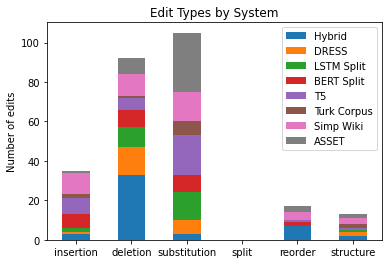

In [8]:
# Example: plot edit types by system
# We need a list because order matters here...
x_labels = ['insertion', 'deletion', 'substitution', 'split', 'reorder', 'structure']
z_labels = [
    'systems/Hybrid.lower',
    'systems/Dress-Ls.lower',
    'systems/lstm_w_split.txt',
    'systems/transformer_w_split.txt',
    'systems/T5.txt',
    'new_systems/turk_corpus_random.txt',
    'new_systems/simple_wiki.txt',
    'new_systems/asset.test.simp.second'
]

width = 0.5
fig, ax = plt.subplots(figsize=(6, 4))
bottom = [0 for x in range(len(edit_types))]

for system in z_labels:
       # need to make sure this is ordered
       val = [sum_edit_types[system][label] for label in x_labels]
       ax.bar(x_labels, val, width, bottom=bottom, label=system_name_mapping[system])
       bottom = [bottom[i] + val[i] for i in range(len(val))]
ax.set_ylabel('Number of edits')
ax.set_title('Edit Types by System')
ax.legend()

plt.rcParams['figure.dpi'] = 300
plt.show()

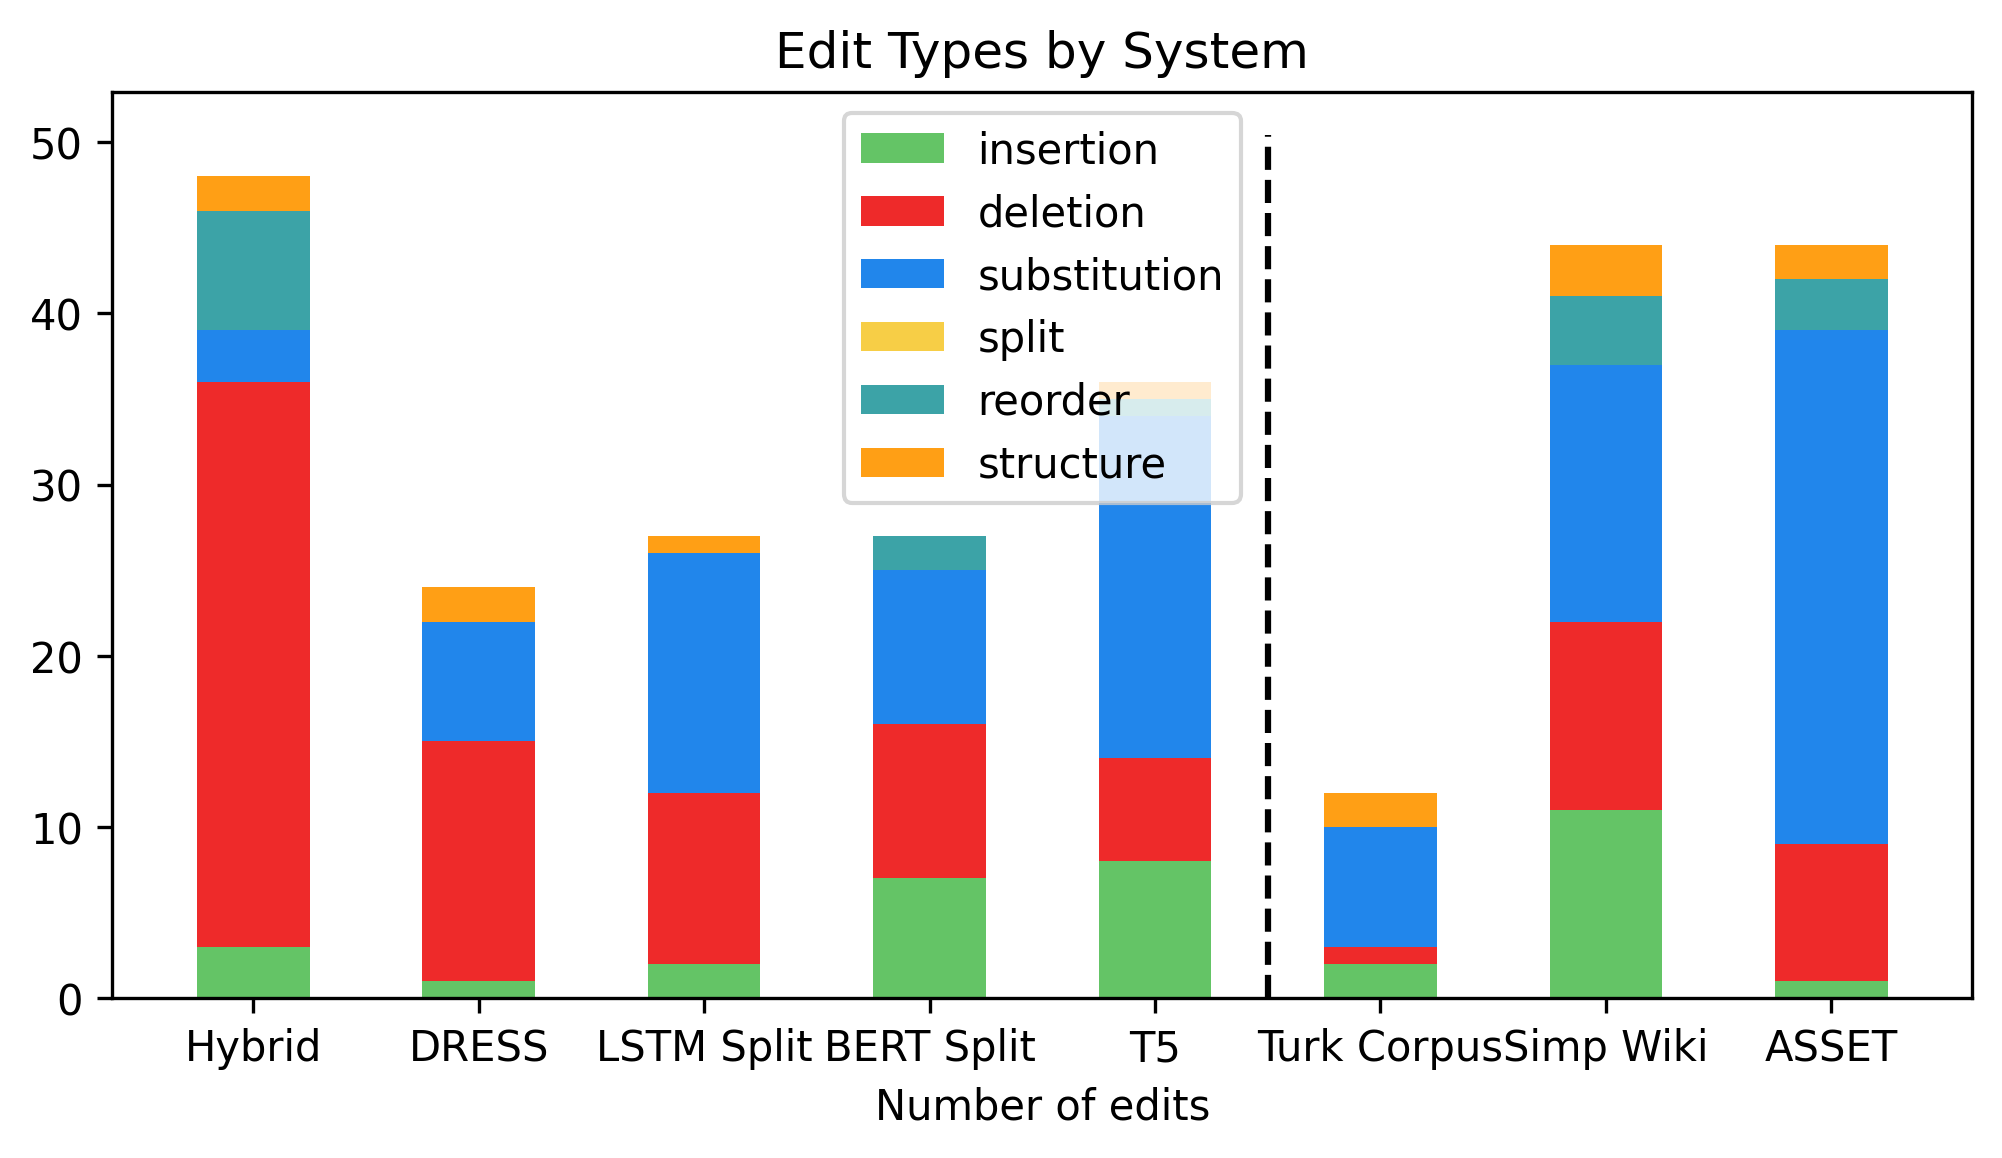

In [25]:
# Same as the above plot but but flip the dimensions
z_labels = ['insertion', 'deletion', 'substitution', 'split', 'reorder', 'structure']
x_labels = [
    'systems/Hybrid.lower',
    'systems/Dress-Ls.lower',
    'systems/lstm_w_split.txt',
    'systems/transformer_w_split.txt',
    'systems/T5.txt',
    'new_systems/turk_corpus_random.txt',
    'new_systems/simple_wiki.txt',
    'new_systems/asset.test.simp.second'
]
width = 0.5

fig, ax = plt.subplots(figsize=(8, 4))

bottom = [0 for x in range(len(x_labels))]
for edit_type in z_labels:
        # need to make sure this is ordered
        val = [sum_edit_types[label][edit_type] for label in x_labels]
        displayed_x_labels = [system_name_mapping[label] for label in x_labels]
        ax.bar(displayed_x_labels, val, width, bottom=bottom, label=edit_type, color=color_mapping[edit_type])
        bottom = [bottom[i] + val[i] for i in range(len(val))]
ax.set_xlabel('Number of edits')
ax.set_title('Edit Types by System')
ax.set_yticks([i*round(max(bottom)/5) for i in range(6)])
ax.plot([4.5, 4.5], [0, ax.get_ylim()[-1]], ls='--', c='k')
ax.legend()

plt.show()

In [10]:
# Same as the above plot but errors per system

In [11]:
# Example: sum the errors
def sum_errors_by_type(data):
    ann = [i for j in [sent['processed_annotations'] for sent in data] for i in j]
    errors = [a for a in ann if a['type'] == Quality.ERROR]

    out = {}
    for error in Error:
        errors_by_type = [e for e in errors if e['error_type'] == error]
        out[error] = len(errors_by_type)
        # display(errors_by_type)
    return out
sum_errors_by_type(data)

{<Error.COREFERENCE: 1>: 20,
 <Error.INFORMATION_REWRITE: 2>: 5,
 <Error.REPETITION: 3>: 9,
 <Error.CONTRADICTION: 4>: 1,
 <Error.HALLUCINATION: 5>: 0,
 <Error.IRRELEVANT: 6>: 4,
 <Error.UNNECESSARY_INSERTION: 7>: 2,
 <Error.COMPLEX_WORDING: 8>: 10}

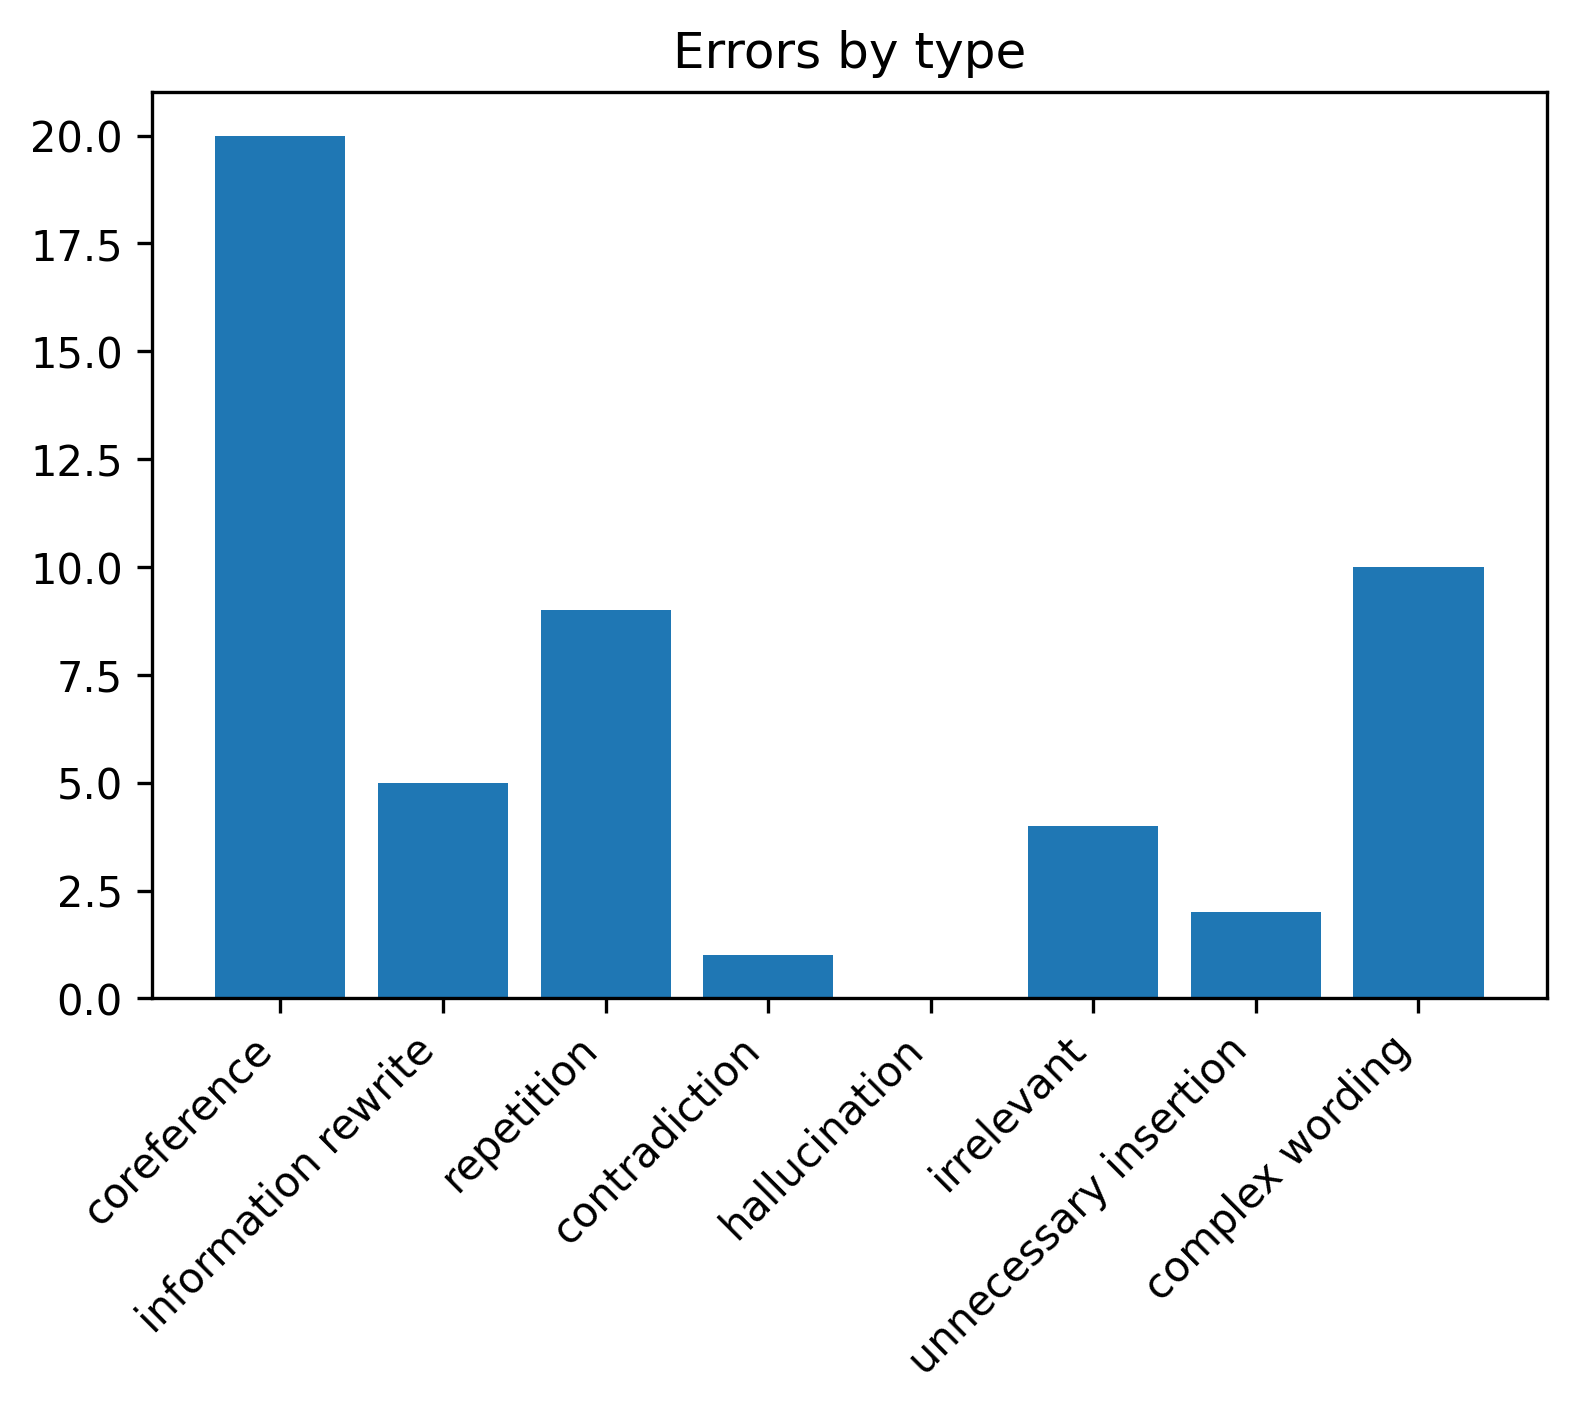

In [12]:
errors = sum_errors_by_type(data)
error_names = [str(x).split('.')[1].lower().replace('_',' ') for x in errors.keys()]

plt.bar(error_names, list(errors.values()), align='center')
plt.xticks(rotation=45, ha="right")
plt.title('Errors by type')
plt.show()

<Figure size 3000x1800 with 0 Axes>

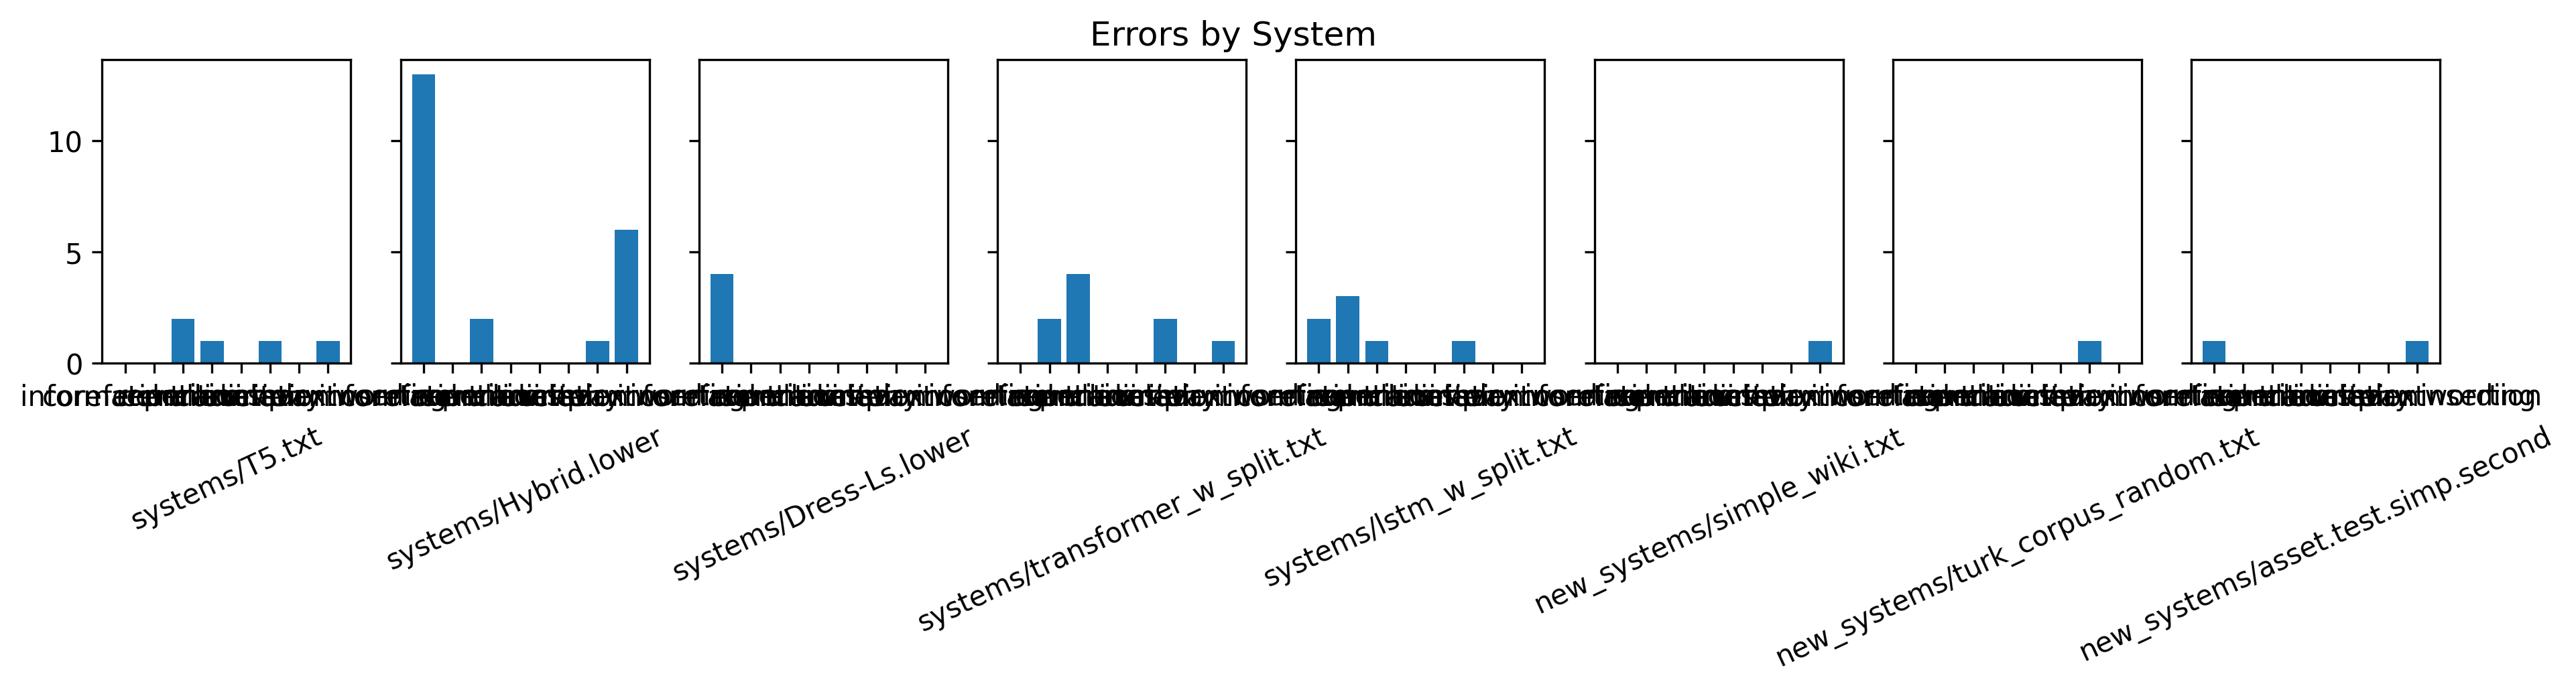

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6), dpi=300) # tight_layout=True
fig, sb = plt.subplots(1, len(systems), sharey='row', figsize=(15, 2))
fig.suptitle('Errors by System')

systems_list = list(systems)
error_names = [str(x).split('.')[1].lower().replace('_',' ') for x in errors.keys()]

i = 0
for subplot in sb:
    errors = sum_errors_by_type(get_sentences_for_system(data, systems_list[i]))
    subplot.bar(error_names, list(errors.values()), align='center')
    subplot.set_xlabel(systems_list[i], rotation=25, ha="center")
    i += 1


# Idea: One stacked graph with number of errors on x axis and system on y axis. Each bar has a stacked set 
# of colors representing each error

In [14]:
list(errors.values())

[1, 0, 0, 0, 0, 0, 0, 1]

In [15]:
# Example: Sum the annotated edits for each system
for system in systems:
    print(system)
    print([x for x in sum_edits_for_system(data, system).values()])

systems/T5.txt
[6, 20, 8, 0, 1, 1]
systems/Hybrid.lower
[33, 3, 3, 0, 7, 2]
systems/Dress-Ls.lower
[14, 7, 1, 0, 0, 2]
systems/transformer_w_split.txt
[9, 9, 7, 0, 2, 0]
systems/lstm_w_split.txt
[10, 14, 2, 0, 0, 1]
new_systems/simple_wiki.txt
[11, 15, 11, 0, 4, 3]
new_systems/turk_corpus_random.txt
[1, 7, 2, 0, 0, 2]
new_systems/asset.test.simp.second
[8, 30, 1, 0, 3, 2]


In [16]:
# Example: Sum the annotated edits for each system
total = 0
for system in systems:
    total += sum([x for x in sum_edits_for_system(data, system).values()])
print(total / 30)

8.733333333333333


In [17]:
import json

# Load tutorial feedback
data = []
for filename in os.listdir('../tutorial/'):
    with open('../tutorial/' + filename) as f:
        individual_annotation = json.load(f)
        for entry in individual_annotation:
            entry['user'] = filename.split('.')[0]
        data += individual_annotation

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# Print spans with comments
for entry in data:
    if 'comment' in entry.keys():
        print(f"{entry['user'].upper()} - HIT {str(entry['id']+1)}: {entry['comment']}")